# Regression Project

### Project Title: Analyse and predict average temperature from the agri-food sector to understand climate impacts.
#### Done By: Brian Lawrence

© ExploreAI 2025

<img src = "https://storage.googleapis.com/kaggle-datasets-images/3526635/6149256/2393d3d0abd7abef0ac98639f57fc9e1/dataset-cover.jpg?t=2023-07-17-13-39-45%2Ftechnologies%2Fheader-images%2F2aVv2twTYW9qZGGhPrxw_AdobeStock_241906053.jpeg&width=1200&height=820" width = "700" height = "500">

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## **Background Context**

* **Purpose:** Analyse and predict average temperature from the agri-food sector to see the impact on crop yield
* **Details:** What other measures can be put in place when the temperatures are not ideal, if any

---
<a href=#one></a>
## **Importing Packages**

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details:** List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [105]:
#Please use code cells to code in and do not forget to comment your code.
#import matplotlib to create visualisations e.g plots
#I've experienced that matplotlib notebook throws errors hence also importing matplotlib inline 
#np to create numerical computations
#pd to create dataframes and data manipulation
#os to read multiple files
#plt to enable the use of MATLAB
#sns creating complex visualisation with ease enhanceing aesthetics
# enabling us to create 3D plots
%matplotlib notebook
%matplotlib inline 
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.graphics.correlation as sm_corr
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

---
<a href=#two></a>
## **Data Collection and Description**

* **Purpose:** Describe how the data was collected and provide an overview of its characteristics.
* **Details:** Mention sources of the data, the methods used for collection (e.g., APIs, web scraping, datasets from repositories), and a general description of the dataset including size, scope, and types of data available (e.g., numerical, categorical).
---

# **Data dictionary**

-  This data was collected over a period of 31 years 1990 up to and including 2020 for 236 countries
-  The source of the data is from kaggle hyperlink: https://www.kaggle.com/datasets/alessandrolobello/agri-food-co2-emission-dataset-forecasting-ml
-  The dataset contains 31 columns / fields and 6965 rows / records
-  There is one categorical fields namely Area and country code and 30 numerical fields



---
<a href=#three></a>
## **Loading Data**

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

In [107]:
#importing \ loading the data
df = pd.read_csv("Agrifood_co2_emission.csv")
df.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


In [108]:
unique_area_count = df['Area'].nunique()
print(unique_area_count)

236


## **Data Preprocessing**

In [109]:
#Checking the shape of the dataset
df.shape

(6965, 31)

In [110]:
#Checking the data types of the columns
df.dtypes

Area                                object
Year                                 int64
Savanna fires                      float64
Forest fires                       float64
Crop Residues                      float64
Rice Cultivation                   float64
Drained organic soils (CO2)        float64
Pesticides Manufacturing           float64
Food Transport                     float64
Forestland                         float64
Net Forest conversion              float64
Food Household Consumption         float64
Food Retail                        float64
On-farm Electricity Use            float64
Food Packaging                     float64
Agrifood Systems Waste Disposal    float64
Food Processing                    float64
Fertilizers Manufacturing          float64
IPPU                               float64
Manure applied to Soils            float64
Manure left on Pasture             float64
Manure Management                  float64
Fires in organic soils             float64
Fires in hu

In [111]:
df['Area'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belgium-Luxembourg', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Channel Islands', 'Chile', 'China', 'China, Hong Kong SAR',
       'China, Macao SAR', 'China, mainland', 'China, Taiwan Province of',
       'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica',
       'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Czechoslovakia',
       "Democratic People's Republic of Korea",
       'Democratic 

In [112]:
#Checking for null values
df.isnull().sum()

Area                                  0
Year                                  0
Savanna fires                        31
Forest fires                         93
Crop Residues                      1389
Rice Cultivation                      0
Drained organic soils (CO2)           0
Pesticides Manufacturing              0
Food Transport                        0
Forestland                          493
Net Forest conversion               493
Food Household Consumption          473
Food Retail                           0
On-farm Electricity Use               0
Food Packaging                        0
Agrifood Systems Waste Disposal       0
Food Processing                       0
Fertilizers Manufacturing             0
IPPU                                743
Manure applied to Soils             928
Manure left on Pasture                0
Manure Management                   928
Fires in organic soils                0
Fires in humid tropical forests     155
On-farm energy use                  956


- Crop residues significantly impact soil temperature, generally lowering maximum soil temperatures and increasing minimum soil temperatures compared to bare soil. This effect is due to the insulating and reflective properties of the residues, which reduce the absorption of solar radiation and the rate of heat exchange between the soil and the atmosphere. 
- The Industrial Processes and Product Use (IPPU) sector's emissions, which are not directly from energy use, can impact global temperatures. IPPU emissions, often associated with industrial processes like manufacturing and chemical production, contribute to the overall greenhouse gas concentration in the atmosphere, leading to global warming. 
- Manure application to soils can impact temperature in a few ways. Generally, it can increase soil temperature, but the effect depends on factors like the type of manure, the application rate, and the soil conditions. The increase is often due to the decomposition of organic matter and chemical reactions during the mineralization of nitrogen. 
- Fires in humid tropical forests significantly impact temperatures, both locally and regionally. Fire significantly alters soil and air temperatures, with the effects being more pronounced on soil than on air. Fires also affect regional climate by altering land surface temperature and energy fluxes, which can influence regional rainfall patterns. 

In [113]:
# Generating descriptive statistics for numeric columns in the DataFrame
df.describe()

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
count,6965.000000,6934.000000,6872.000000,5576.000000,6965.000000,6965.000000,6965.000000,6965.000000,6472.000000,6.472000e+03,...,6037.000000,6965.000000,6810.000000,6009.000000,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6965.000000
mean,2005.124910,1188.390893,919.302167,998.706309,4259.666673,3503.228636,333.418393,1939.581760,-17828.285678,1.760564e+04,...,2263.344946,1210.315532,668.452931,3008.982252,1.785774e+07,1.693230e+07,1.761963e+07,1.732447e+07,6.409124e+04,0.872989
std,8.894665,5246.287783,3720.078752,3700.345330,17613.825187,15861.445678,1429.159367,5616.748808,81832.210543,1.011575e+05,...,7980.542461,22669.847760,3264.879486,12637.864430,8.901521e+07,6.574362e+07,7.603993e+07,7.251711e+07,2.283130e+05,0.555930
min,1990.000000,0.000000,0.000000,0.000200,0.000000,0.000000,0.000000,0.000100,-797183.079000,0.000000e+00,...,0.432900,0.000000,0.000000,0.031900,0.000000e+00,0.000000e+00,2.500000e+02,2.700000e+02,-3.918841e+05,-1.415833
25%,1997.000000,0.000000,0.000000,11.006525,181.260800,0.000000,6.000000,27.958600,-2848.350000,0.000000e+00,...,37.632100,0.000000,0.000000,13.291900,9.731100e+04,2.173860e+05,2.013260e+05,2.078900e+05,5.221244e+03,0.511333
50%,2005.000000,1.651850,0.517900,103.698200,534.817400,0.000000,13.000000,204.962800,-62.920000,4.444000e+01,...,269.856300,0.000000,0.000000,141.096300,1.595322e+06,2.357581e+06,2.469660e+06,2.444135e+06,1.214765e+04,0.834300
75%,2013.000000,111.081400,64.950775,377.640975,1536.640000,690.408800,116.325487,1207.000900,0.000000,4.701746e+03,...,1126.818900,0.000000,9.577875,1136.925400,8.177340e+06,8.277123e+06,9.075924e+06,9.112588e+06,3.513973e+04,1.206750
max,2020.000000,114616.401100,52227.630600,33490.074100,164915.255600,241025.069600,16459.000000,67945.765000,171121.076000,1.605106e+06,...,70592.646500,991717.543100,51771.256800,248879.176900,9.000991e+08,9.020778e+08,7.435866e+08,7.133419e+08,3.115114e+06,3.558083


---
<a href=#four></a>
## **Data Cleaning and Filtering**

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Include steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).
---

In [161]:
#checking for null values in the data
print(df.isnull().sum())
#identified 1389, 743 and 928 null values for Crop Residues, IPPU, Manure applied to Soils and Fires in humid tropical forests
#these varaibles contribute highly to temperture changes an as a result will not be excluded in the models.


Area                                       0
Year                                       0
Savanna fires                              0
Forest fires                               0
Crop Residues                              0
Rice Cultivation                           0
Drained organic soils (CO2)                0
Pesticides Manufacturing                   0
Food Transport                             0
Forestland                                 0
Net Forest conversion                      0
Food Household Consumption                 0
Food Retail                                0
On-farm Electricity Use                    0
Food Packaging                             0
Agrifood Systems Waste Disposal            0
Food Processing                            0
Fertilizers Manufacturing                  0
IPPU                                       0
Manure applied to Soils                    0
Manure left on Pasture                     0
Manure Management                          0
Fires in o

In [115]:
# Replacing all missing (NaN) values in the DataFrame with 0
df.fillna(0,inplace = True)

In [162]:
##X = df.drop('Average_Temperature_°C_with_forestland', 'Area', axis=1)
X = df.drop(columns=['AverageTemperature°C_with_forestland', 'Area'], axis=1)

y = df['AverageTemperature°C_with_forestland']

In [ ]:
# create scaler object
scaler = StandardScaler()

In [149]:
# create scaled version of the predictors (there is no need to scale the response)
X_scaled = scaler.fit_transform(X)

In [151]:
X_standardise = pd.DataFrame(X_scaled,columns=X.columns)
X_standardise.head()

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission
0,-1.700569,-0.223194,-0.245366,-0.178115,-0.202904,-0.22088,-0.225051,-0.334108,0.179442,-0.167603,...,-0.211745,-0.219924,-0.053393,-0.20237,-0.220313,-0.092155,-0.218111,-0.161391,-0.165187,-0.271105
1,-1.588134,-0.223194,-0.245366,-0.176948,-0.203350,-0.22088,-0.225118,-0.334447,0.179442,-0.167603,...,-0.204417,-0.216827,-0.053393,-0.20237,-0.220313,-0.085691,-0.215536,-0.161067,-0.164832,-0.270558
2,-1.475699,-0.223194,-0.245366,-0.180836,-0.202904,-0.22088,-0.225118,-0.335853,0.179442,-0.167603,...,-0.204827,-0.215914,-0.053393,-0.20237,-0.220313,-0.077095,-0.212152,-0.152446,-0.155775,-0.270416
3,-1.363264,-0.223194,-0.245366,-0.170554,-0.202904,-0.22088,-0.225118,-0.335667,0.179442,-0.167603,...,-0.205985,-0.215489,-0.053393,-0.20237,-0.220313,-0.067405,-0.208329,-0.139621,-0.142381,-0.270362
4,-1.250829,-0.223194,-0.245366,-0.167186,-0.201792,-0.22088,-0.225118,-0.335733,0.179442,-0.167603,...,-0.200888,-0.213430,-0.053393,-0.20237,-0.220313,-0.058057,-0.204593,-0.130022,-0.132425,-0.269783


In [152]:
#Rename the Average Temperature °C  column
df.rename(columns= {"Average Temperature °C": "AverageTemperature°C_with_forestland"}, inplace = True)

#Calculate Average Temperature °C excluding the "Forestland" Average Temperature °C .
df["AverageTemperature°C_without_forestland"] = X_standardise[
    [
        "Year",
        "Savanna fires",
        "Forest fires",
        "Crop Residues",
        "Rice Cultivation",
        "Drained organic soils (CO2)",
        "Pesticides Manufacturing",
        "Food Transport",
        "Net Forest conversion",
        "Food Household Consumption",
        "On-farm Electricity Use",
        "Food Packaging",
        "Agrifood Systems Waste Disposal",
        "Food Processing",
        "Fertilizers Manufacturing",
        "IPPU",
        "Manure applied to Soils",
        "Manure left on Pasture",
        "Manure Management",
        "Fires in organic soils",
        "Fires in humid tropical forests",
        "On-farm energy use",
        "total_emission",
    ]
].sum(axis=1)

In [121]:
# Defining a list of temperature sources related to fires
fires = [ 'Savanna fires', 'Forest fires', 'Fires in organic soils', 'Fires in humid tropical forests']

# Defining a list of temperature sources related to agricultural practices
agricultural_practices = [
    'Crop Residues', 'Rice Cultivation', 'Drained organic soils (CO2)', 
    'Manure applied to Soils', 'Manure left on Pasture', 'Manure Management']

# Defining a list of temperature sources related to agri-food system practices
agri_food_system_related_practices = [
    'Pesticides Manufacturing', 'Food Transport', 'Food Household Consumption', 'Food Retail', 
    'On-farm Electricity Use', 'Food Packaging', 'Agrifood Systems Waste Disposal', 
    'Food Processing', 'Fertilizers Manufacturing', 'IPPU', 'On-farm energy use', 'total_emission']

print("Fires:", fires)
print("\nAgricultural Practices:", agricultural_practices)
print("\nAgri-Food System-Related Practices:", agri_food_system_related_practices)

Fires: ['Savanna fires', 'Forest fires', 'Fires in organic soils', 'Fires in humid tropical forests']

Agricultural Practices: ['Crop Residues', 'Rice Cultivation', 'Drained organic soils (CO2)', 'Manure applied to Soils', 'Manure left on Pasture', 'Manure Management']

Agri-Food System-Related Practices: ['Pesticides Manufacturing', 'Food Transport', 'Food Household Consumption', 'Food Retail', 'On-farm Electricity Use', 'Food Packaging', 'Agrifood Systems Waste Disposal', 'Food Processing', 'Fertilizers Manufacturing', 'IPPU', 'On-farm energy use', 'total_emission']


<a href=#four></a>
## **Trends in Average Total Temparatures over Time: With and Without Forestland**

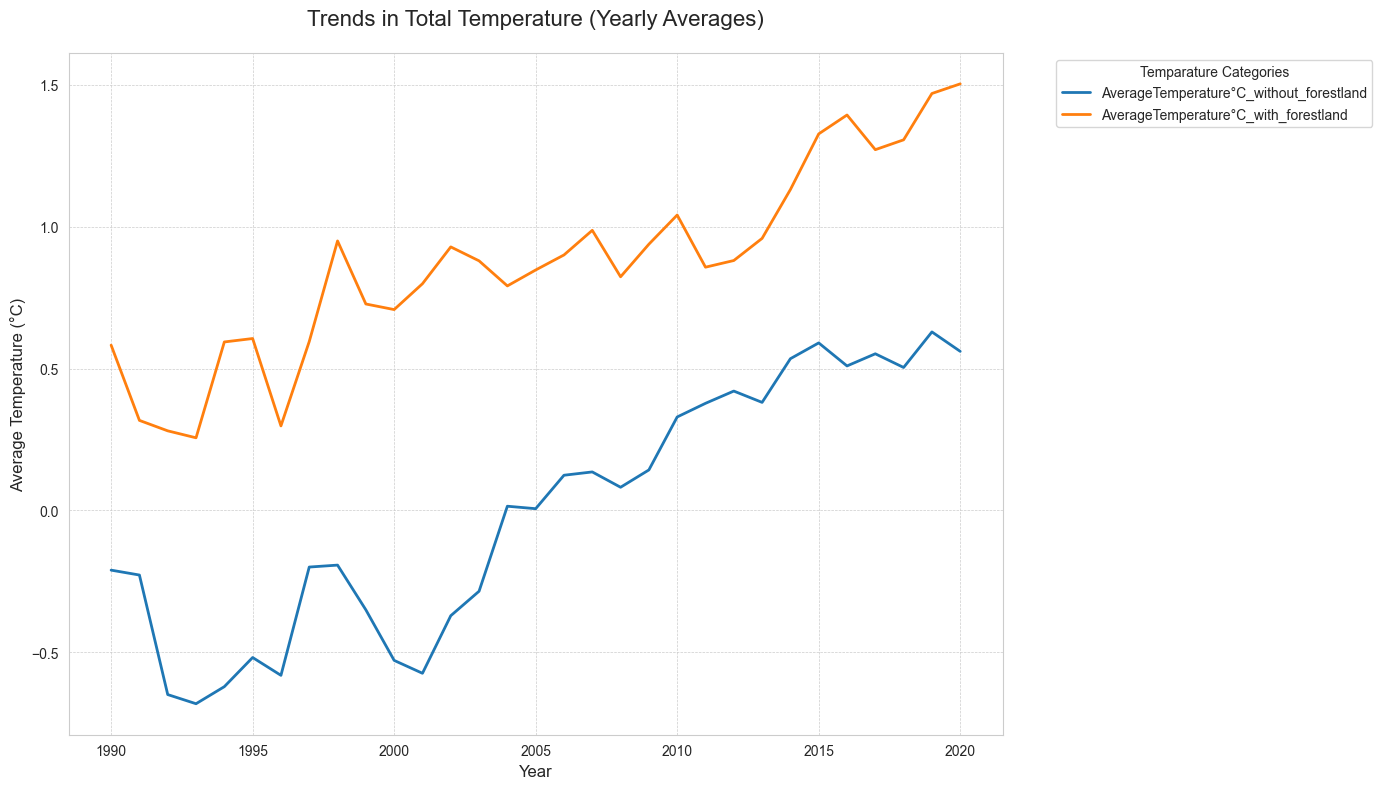

In [126]:
# Grouping the DataFrame by the "Year" column
# This groups the data by each year in order to calculate the mean raindfall 
temperature_data = df.groupby("Year")[["AverageTemperature°C_without_forestland", "AverageTemperature°C_with_forestland"]].mean()

# Styling
sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))

# Directly plot the entire DataFrame
temperature_data.plot(ax=plt.gca(), linewidth=2)

# Title and labels
plt.title("Trends in Total Temperature (Yearly Averages)", fontsize=16, pad=20)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Temperature (°C)", fontsize=12)
plt.legend(title="Temparature Categories", fontsize=10, loc="upper left", bbox_to_anchor=(1.05, 1))
plt.grid(visible=True, which="major", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

In [128]:
# Calculating the mean value of the "Forestland" column for each area
df.groupby("Area")[["AverageTemperature°C_with_forestland"]].mean().sort_values(by="AverageTemperature°C_with_forestland", ascending= True).head(10).reset_index()

,Area,AverageTemperature°C_with_forestland
0,Micronesia (Federated States of),0.231883
1,Cook Islands,0.247414
2,Marshall Islands,0.265972
3,Yugoslav SFR,0.287542
4,Zimbabwe,0.320452
5,Ethiopia PDR,0.338704
6,Chile,0.385917
7,Pacific Islands Trust Territory,0.395000
8,Botswana,0.400852
9,Bangladesh,0.418005


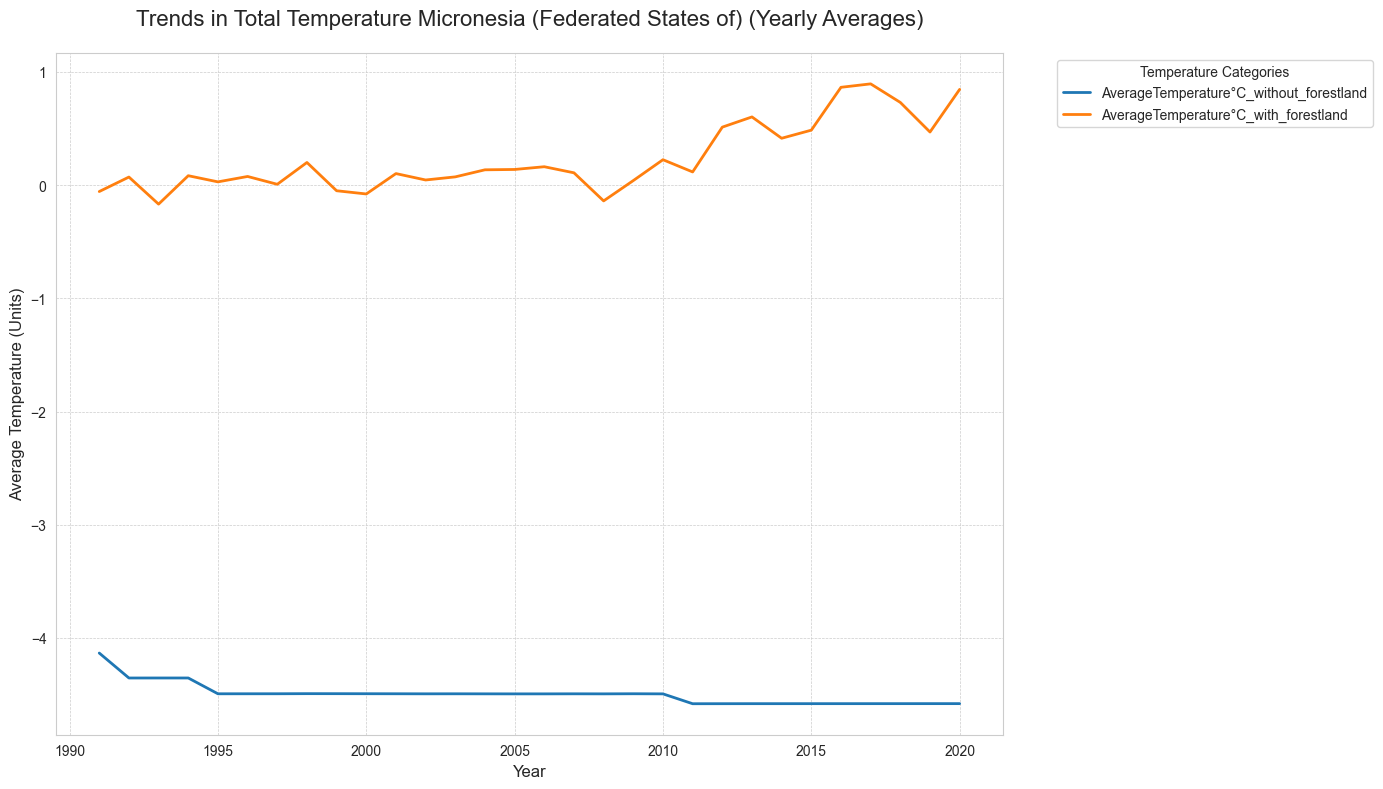

In [129]:
# Filter data for "Micronesia (Federated States of)" and calculate mean emissions by year
Micronesia_temperature_data = (
    df[df["Area"] == "Micronesia (Federated States of)"]
    .groupby("Year")[["AverageTemperature°C_without_forestland", "AverageTemperature°C_with_forestland"]]
    .mean()
)

# Styling
sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))

# Directly plot the filtered DataFrame
Micronesia_temperature_data.plot(ax=plt.gca(), linewidth=2)

# Title and labels
plt.title("Trends in Total Temperature Micronesia (Federated States of) (Yearly Averages)", fontsize=16, pad=20)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Temperature (Units)", fontsize=12)
plt.legend(title="Temperature Categories", fontsize=10, loc="upper left", bbox_to_anchor=(1.05, 1))
plt.grid(visible=True, which="major", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

## **How is the % of agri food temperatures related to total temperatures**

In [134]:

# Calculate the total emissions from the agrifood sector in 2019, convert the result to gigatons, 
# and determine its percentage of the estimated global emissions.

y_2019 = df.loc[df["Year"]==2019]
kt_2019 =y_2019["AverageTemperature°C_with_forestland"].mean()
gt_2019 = round(kt_2019,2) # the amount
perc = gt_2019 / 30

print(f"The average temperature from agrifood in 2019 is {gt_2019} °C, that is:",round(perc * 100), "%","of total average temperature!")

The average temperature from agrifood in 2019 is 1.47 °C, that is: 5 % of total average temperature!


## **How do Average temperatures vary over time?**

<Figure size 1400x800 with 0 Axes>

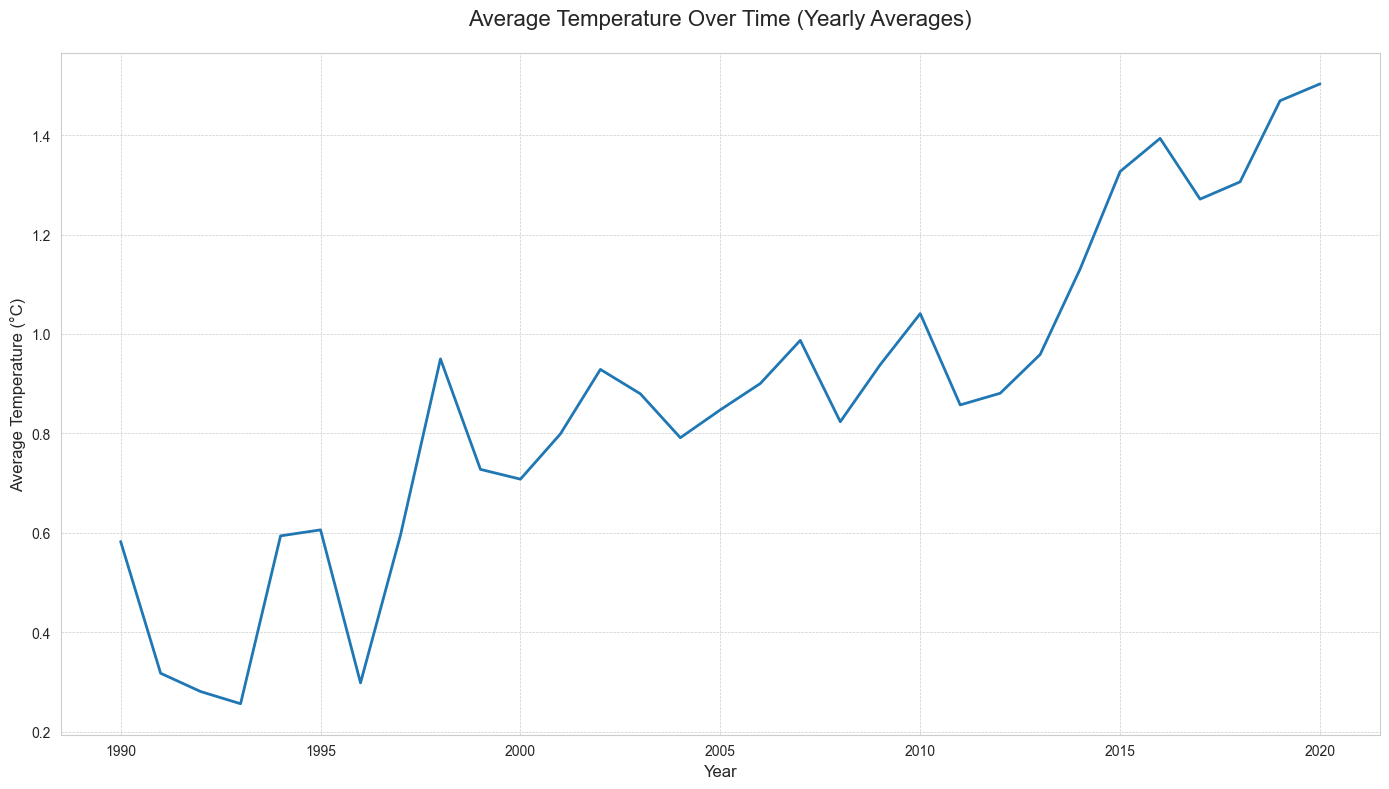

In [136]:
# Group data by year and calculate the sum of emissions
average_temps_by_year = df.groupby("Year")[["AverageTemperature°C_with_forestland"]].mean()

# Styling
sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))

# Plot using seaborn's lineplot
sns.lineplot(data=average_temps_by_year, x="Year", y="AverageTemperature°C_with_forestland", linewidth=2)

# Title and labels
plt.title("Average Temperature Over Time (Yearly Averages)", fontsize=16, pad=20)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Temperature (°C)", fontsize=12)

# Grid customization
plt.grid(visible=True, which="major", linestyle="--", linewidth=0.5)

# Ensure layout fits well
plt.tight_layout()
plt.show()

## **Which regions received the least average temperatures?**

C:\Users\Brian\AppData\Local\Temp\ipykernel_13844\3000734358.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("coolwarm_r", len(top_20_average_temperatures_by_region))


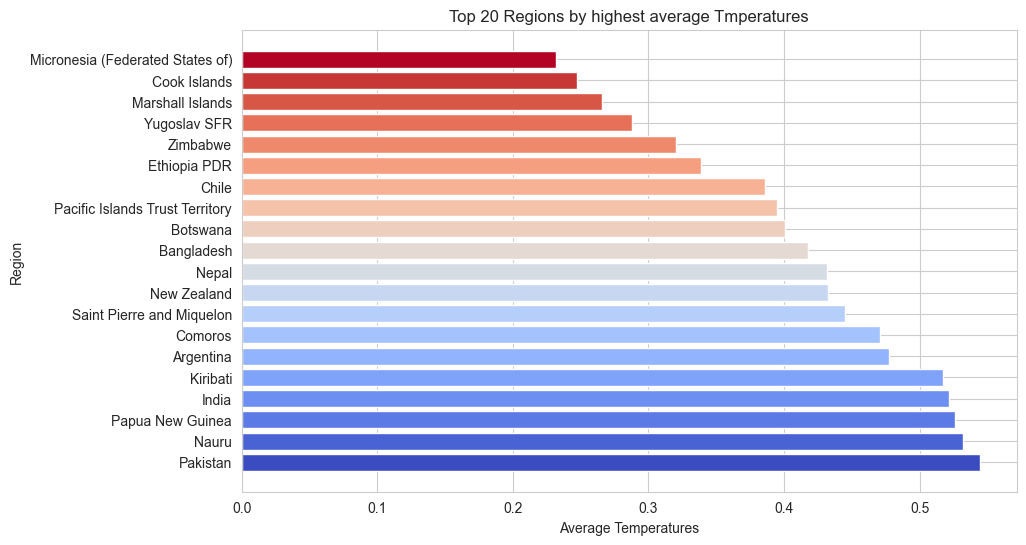

In [141]:
# Visualizing the top 20 regions with the lowest average temperatures, including forestland contributions.

# Group the data by region ("Area") and calculate the average temperatures for each region
average_temperatures_by_region = df.groupby("Area")[["AverageTemperature°C_with_forestland"]].mean().sort_values(by = "AverageTemperature°C_with_forestland")

# Extract the top 20 regions with the lowest average temperatures and reset the index for visualization
top_20_average_temperatures_by_region = average_temperatures_by_region[:20].reset_index()

# Create a horizontal bar plot to visualize the top 20 regions
colors = plt.cm.get_cmap("coolwarm_r", len(top_20_average_temperatures_by_region))
plt.figure(figsize= (10,6))
plt.barh(top_20_average_temperatures_by_region["Area"],top_20_average_temperatures_by_region["AverageTemperature°C_with_forestland"], color = colors(range(len(top_20_average_temperatures_by_region))))
plt.title("Top 20 Regions by highest average Tmperatures")
plt.xlabel("Average Temperatures")
plt.ylabel("Region")
plt.gca().invert_yaxis()
plt.show()

## **What agricultural practices are the key contributors to average temperatures?**

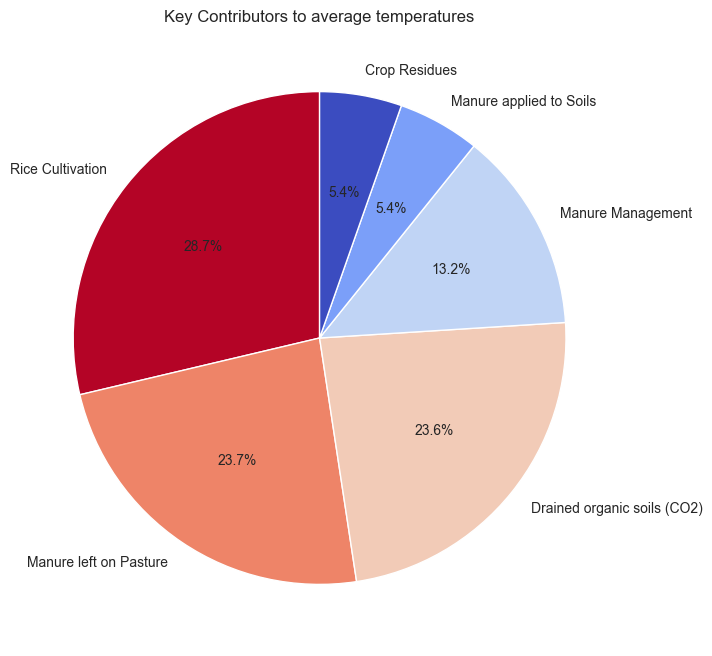

In [142]:
# Visualizing the contribution of different agricultural practices to average temperatures.

# Calculate the average temperatures for each agricultural practice
key_contributors = df[agricultural_practices].mean().sort_values(ascending=False)


# Define colors for the pie chart slices using a colormap
num_slices = len(key_contributors)
colors = plt.cm.coolwarm_r(np.linspace(0, 1, num_slices))

# Plot a pie chart to visualize the contribution of each agricultural practice
key_contributors.plot(
    kind="pie",
    autopct='%1.1f%%',
    startangle=90,
    figsize=(8, 8),
    colors=colors 
)
plt.title("Key Contributors to average temperatures")
plt.ylabel("")
plt.show()

**Top 3 contributors to CO2 Emissions:**

1. Rice Cultivation
2. Manure left on Pasture
3. Drained organic soils

## **What are the trends average temperatures from agricultural practices?**

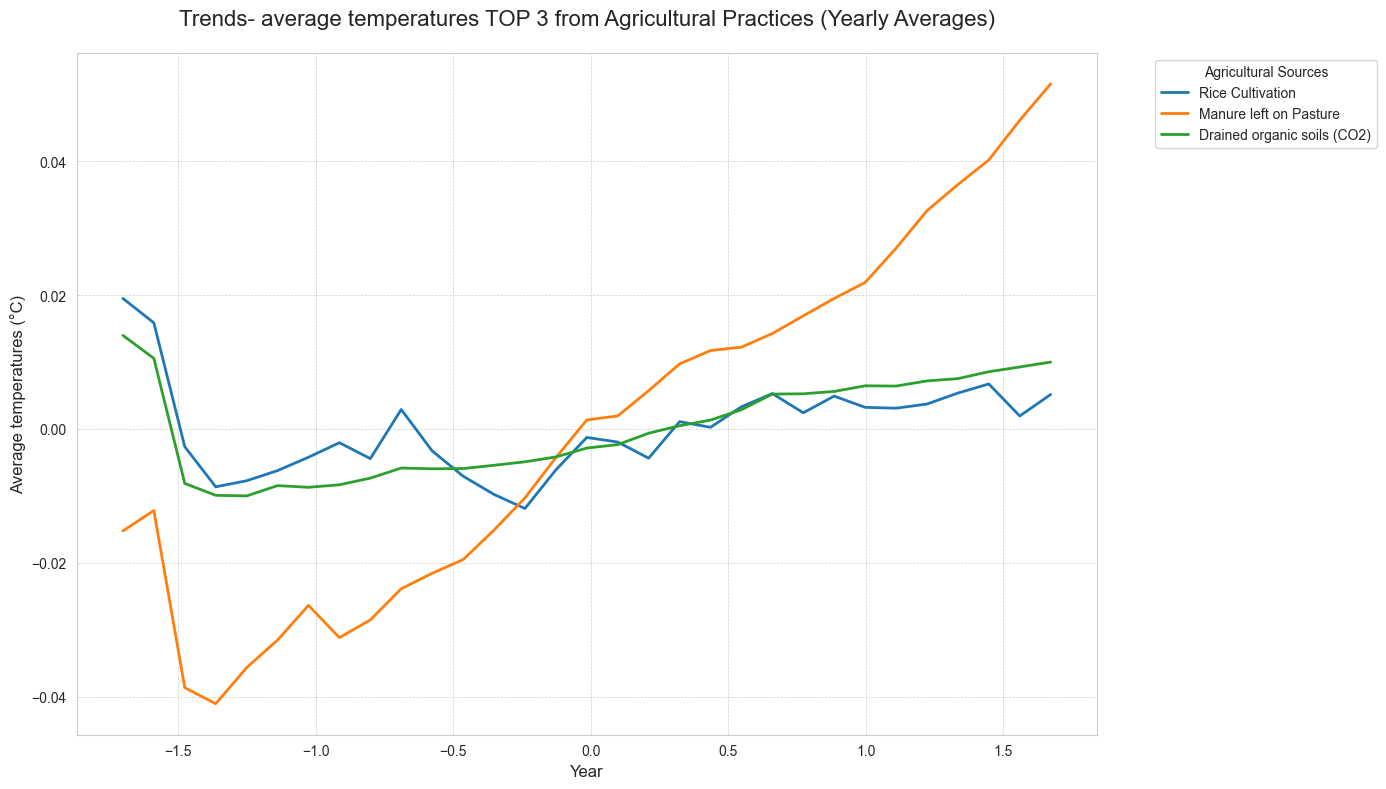

In [163]:
# Calculate mean values for top 3 agricultural columns by year
agriculture_data = X_standardise.groupby(["Year"])[["Rice Cultivation", "Manure left on Pasture", "Drained organic soils (CO2)"]].mean()

# Styling
sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))

# Directly plot the entire DataFrame
agriculture_data.plot(ax=plt.gca(), linewidth=2)

# Title and labels
plt.title("Trends- average temperatures TOP 3 from Agricultural Practices (Yearly Averages)", fontsize=16, pad=20)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average temperatures (°C)", fontsize=12)
plt.legend(title="Agricultural Sources", fontsize=10, loc="upper left", bbox_to_anchor=(1.05, 1))
plt.grid(visible=True, which="major", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

## **How fires contribute to average?**

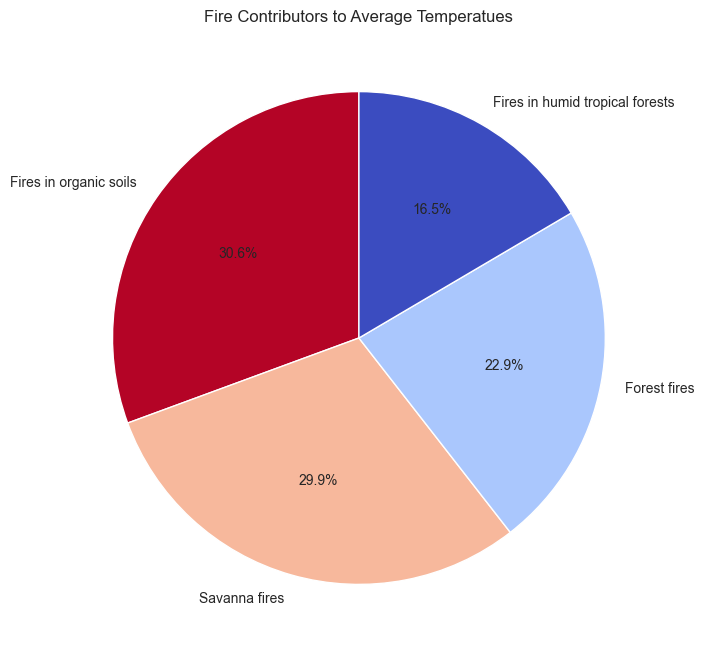

In [155]:
# Visualizing the contribution of different types of fires to total CO2 emissions.

# Calculate the total emissions for each fire-related source
fire_contributors = df[fires].sum().sort_values(ascending=False)

# Define colors for the pie chart slices using a colormap
num_slices = len(fire_contributors)
colors = plt.cm.coolwarm_r(np.linspace(0, 1, num_slices))

# Plot a pie chart to visualize the contribution of each fire-related source
fire_contributors.plot(
    kind="pie",
    autopct='%1.1f%%',
    startangle=90,
    figsize=(8, 8),
    colors=colors 
)
plt.title("Fire Contributors to Average Temperatues")
plt.ylabel("")
plt.show()

---
<a href=#six></a>
## **Modeling**

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


## **1. Load and Preprocess Data**

In [192]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Drop any non-numeric columns that won't be used for prediction
#df = df.drop(columns=['Area', 'Year'])  previously dropped

# Handle missing values

# Define features (X) and target (y)
X = df.drop(columns=['AverageTemperature°C_with_forestland'])
y = df['AverageTemperature°C_with_forestland']

# Normalize feature values for better model performance
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## **2. Train a Regression Model**

In [171]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train Ridge model
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 0.27574424022945215
R² Score: 0.10055176152473133


## **3. Feature Importance & Refinement**

In [188]:
# Get feature importance based on Ridge coefficients
importance = np.abs(model.coef_)
feature_names = df.drop(columns=['AverageTemperature°C_with_forestland','AverageTemperature°C_without_forestland']).columns

# Display top influencing features
feature_importance = sorted(zip(feature_names, importance), key=lambda x: x[1], reverse=True)
print("Most impactful features:")
for feature, impact in feature_importance[:10]:  # Show top 10
    print(f"{feature}: {impact:.4f}")


Most impactful features:
Fires in organic soils: 1.4921
On-farm energy use: 1.2078
Savanna fires: 1.1372
total_emission: 1.1129
Rice Cultivation: 0.9593
Pesticides Manufacturing: 0.9230
Forest fires: 0.9159
Food Packaging: 0.8383
Manure applied to Soils: 0.7572
Manure Management: 0.6537


In [189]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_scaled)

X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

model_poly = Ridge(alpha=1.0)
model_poly.fit(X_train_poly, y_train)

y_pred_poly = model_poly.predict(X_test_poly)

print("Polynomial Ridge Regression MSE:", mean_squared_error(y_test, y_pred_poly))
print("Polynomial Ridge Regression R²:", r2_score(y_test, y_pred_poly))


Polynomial Ridge Regression MSE: 0.25872501366804485
Polynomial Ridge Regression R²: 0.15606665945380982


In [175]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Add a constant to X_test
X_test_const = sm.add_constant(X_test)

# Compute residuals
residuals = y_test - y_pred

# Run Breusch-Pagan test
_, pval, _, _ = het_breuschpagan(residuals, X_test_const)
print("Breusch-Pagan test p-value:", pval)



Breusch-Pagan test p-value: 0.002194413564130531


## **Regression Visualisations**

## **1. Scatter Plot of Actual vs. Predicted Values**

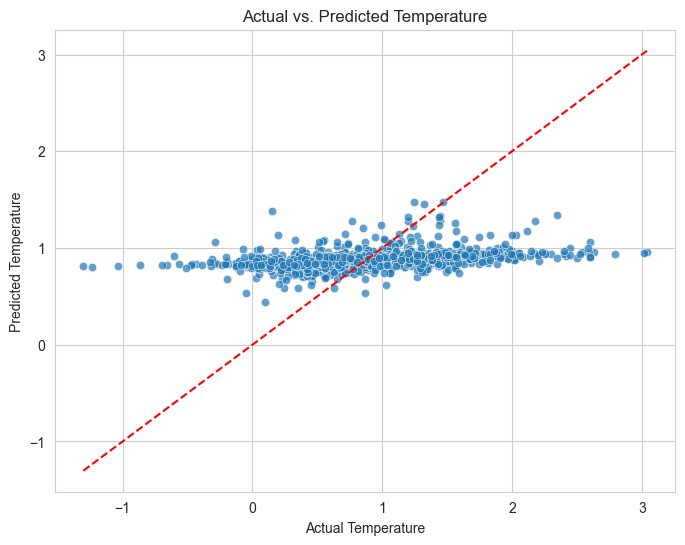

In [185]:
# Create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)

# Add line of perfect prediction
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

# Labels and title
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Actual vs. Predicted Temperature")
plt.show()


## **2. Residual Plot**

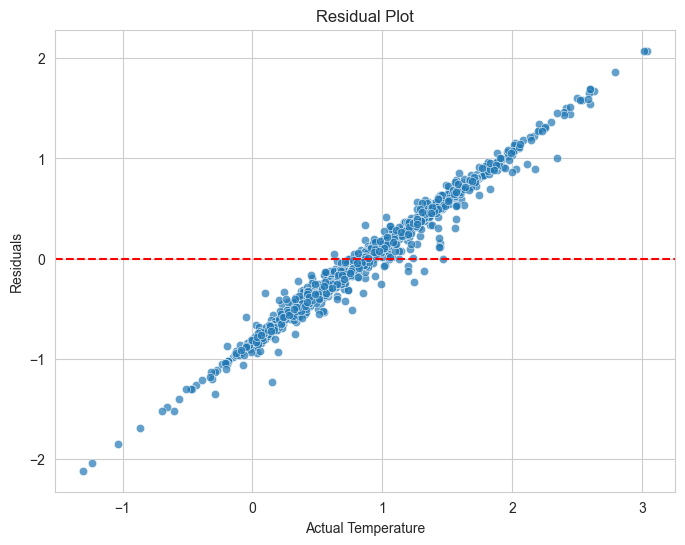

In [177]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')

plt.xlabel("Actual Temperature")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


## **3. Distribution of Predictions**

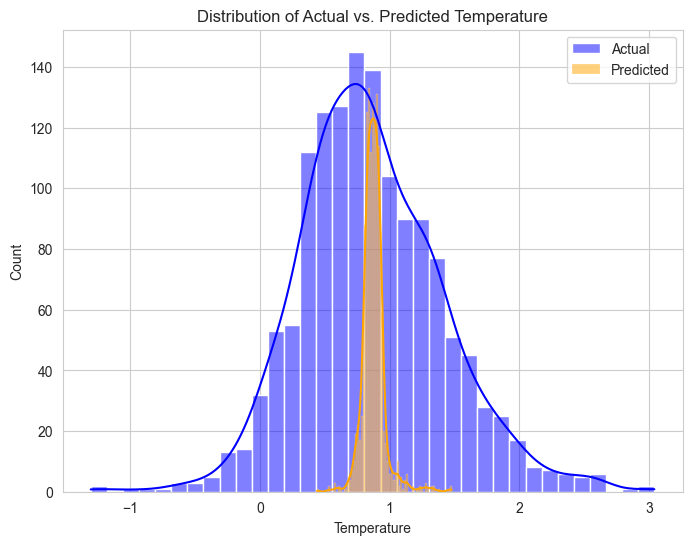

In [178]:
plt.figure(figsize=(8, 6))
sns.histplot(y_test, color="blue", label="Actual", kde=True)
sns.histplot(y_pred, color="orange", label="Predicted", kde=True)

plt.legend()
plt.title("Distribution of Actual vs. Predicted Temperature")
plt.xlabel("Temperature")
plt.show()


## **4. Feature Importance Bar Chart**

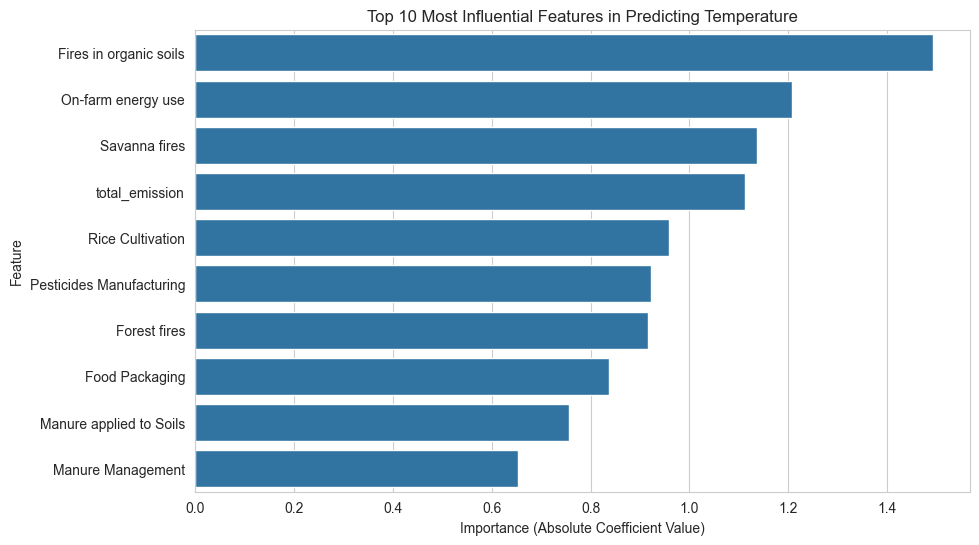

In [180]:
import numpy as np
import matplotlib.pyplot as plt

# Get absolute coefficient values from the Ridge model
importance = np.abs(model.coef_)
feature_names = df.drop(columns=['AverageTemperature°C_with_forestland', 'AverageTemperature°C_without_forestland']).columns

# Sort by impact
feature_importance = sorted(zip(feature_names, importance), key=lambda x: x[1], reverse=True)

# Convert to DataFrame for visualization
feature_df = pd.DataFrame(feature_importance, columns=["Feature", "Importance"])

# Plot the top 10 most important features
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_df.head(10))

plt.title("Top 10 Most Influential Features in Predicting Temperature")
plt.xlabel("Importance (Absolute Coefficient Value)")
plt.ylabel("Feature")
plt.show()


## **5. Pairplot for Key Features**

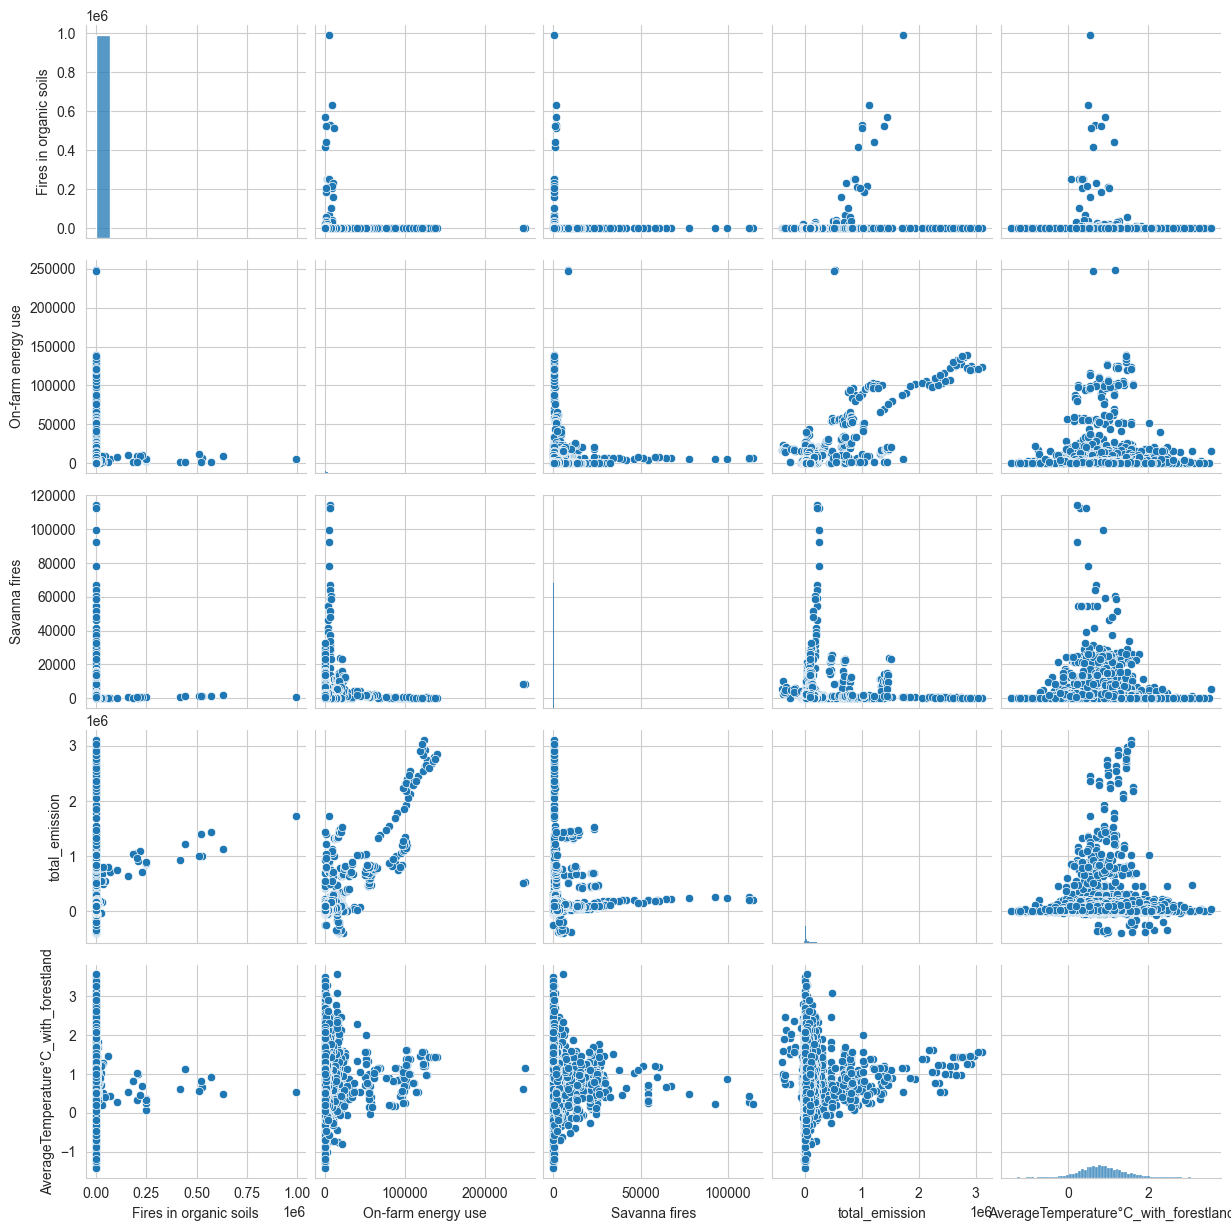

In [183]:
selected_features = ["Fires in organic soils", "On-farm energy use", "Savanna fires", "total_emission"] 
subset_df = df[selected_features + ['AverageTemperature°C_with_forestland']]

sns.pairplot(subset_df)
plt.show()


---
<a href=#ten></a>
## **References**

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---

  #The source of the data is from kaggle hyperlink: https://www.kaggle.com/datasets/webdevbadger/world-forest-area
  and Google

## Additional Sections to Consider

* ### Appendix: 
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.

* ### Contributors: 
Brian Lawrence.
